# Accessing diffusion data and computing diffusivity
We will work with the traditional "five frequency" model for solute diffusion in a face-centered cubic (FCC) lattice. A relatively large database of solute barriers was published by the Dane Morgan group recently; [paper](https://doi.org/10.1038/sdata.2016.54) with the [public database](https://doi.org/10.6084/m9.figshare.1546772.v10) which we will use for our computation.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.constants
# grab Boltzmann's constant; we'll need it later
kBoltzmann = scipy.constants.physical_constants['Boltzmann constant in eV/K'][0]

The datafile we need is an Excel spreadsheet, available at https://ndownloader.figshare.com/files/12753815. In addition, you should investigate the structure of the database at https://figshare.com/articles/dataset/DFT_dilute_solute_diffusion_in_Al_Cu_Ni_Pd_Pt_and_Mg/1546772

We use `sheet_name=None` to get all of the sheets; the first sheet is the host information, followed by different solutes.

Some information about what we're going to see:

* The first sheet is "host information"; it has the element name, crystal structure, lattice constant, vacancy formation energy. In addition, the Morgan group identifies a "correction shift" `A_shift` and energy shift `E_shift` that they apply to the diffusivity data, of the form $A_\text{shift}\exp(-E_\text{shift}/k_\text{B}T)$.
* Each subsequent sheet has all of the solute data, which includes the hop barriers and attempt frequencies

In [2]:
diffusionDB = pd.read_excel('https://ndownloader.figshare.com/files/12753815', 
                            sheet_name=None)

/opt/local/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/openpyxl/worksheet/_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [3]:
diffusionDB

{'Host Information':                                     Host element name        Al        Cu  \
 0                              Host crystal structure       FCC       FCC   
 1                        Host melting temperature [K]       933      1358   
 2                  Host vacancy formation energy [eV]    0.4847    0.9628   
 3                 Host lattice constant, a [angstrom]  4.039094  3.633779   
 4                 Host lattice constant, c [angstrom]       NaN       NaN   
 5       Host self-diffusion correction shift, A_shift        12        80   
 6   Host self-diffusion correction shift, E_shift ...       0.2       0.4   
 7                                                 NaN       NaN       NaN   
 8                              Additional Information       NaN       NaN   
 9                                                 NaN       NaN       NaN   
 10                                                NaN       NaN       NaN   
 11                                         

In [4]:
diffusionDB.keys()

dict_keys(['Host Information', 'Al-X', 'Cu-X', 'Ni-X', 'Pd-X', 'Pt-X', 'Mg-X', 'W-X', 'Mo-X', 'Fe-X', 'Au-X', 'Ca-X', 'Ir-X', 'Pb-X', 'Ag-X', 'Zr-X'])

In [5]:
diffusionDB['Host Information']

,Host element name,Al,Cu,Ni,Pd,Pt,Mg,W,Mo,Fe,Au,Ca,Ir,Pb,Ag,Unnamed: 15
0,Host crystal structure,FCC,FCC,FCC,FCC,FCC,HCP,BCC,BCC,BCC,FCC,FCC,FCC,FCC,FCC,NaN
1,Host melting temperature [K],933,1358,1728,1828,2041,923,3695,2896,1811,1337,1115,2719,600,1234,NaN
2,Host vacancy formation energy [eV],0.4847,0.9628,1.39014,1.1365,0.6112,0.7978,3.052665,2.936949,2.22277,0.4097,1.131886,1.582394,0.416922,0.78365,NaN
3,"Host lattice constant, a [angstrom]",4.039094,3.633779,3.507861,3.933174,3.962852,3.193777,3.18834,3.157333,2.82491,4.1565,5.504164,3.87636,5.015953,4.142557,NaN
4,"Host lattice constant, c [angstrom]",NaN,NaN,NaN,NaN,NaN,5.175814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"Host self-diffusion correction shift, A_shift",12,80,500,20,20,240,800,2400,1000,60,1260,85,240,55,NaN
6,"Host self-diffusion correction shift, E_shift ...",0.2,0.4,0.47,0.55,0.85,0.2,1.3,1,0.08,0.85,0.09,0.42,0.1,0.43,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Additional Information,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diffusion values for Fe-X are given for the al...,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"The paramagnetic D0 and Q are given here, the ...",NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
host_element = 'Al'
diffusionDB['Host Information'][host_element]

0          FCC
1          933
2       0.4847
3     4.039094
4          NaN
5           12
6          0.2
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
Name: Al, dtype: object

In [7]:
a0 = diffusionDB['Host Information'][host_element][3]
Evform = diffusionDB['Host Information'][host_element][2]
A_shift, E_shift = diffusionDB['Host Information'][host_element][5], diffusionDB['Host Information'][host_element][6]
print(a0, Evform)

4.03909354 0.4847


In [8]:
solute_elements = host_element + '-X'
diffusionDB[solute_elements]

,Solute element number,13,47,33,79,83,20,48,58,27,...,73,43,52,22,81,23,74,39,30,40
0,Solute element name,Al,Ag,As,Au,Bi,Ca,Cd,Ce,Co,...,Ta,Tc,Te,Ti,Tl,V,W,Y,Zn,Zr
1,"Hop activation barrier, E_0 [eV]",0.58143,0.58143,0.58143,0.58143,0.58143,0.58143,0.58143,0.58143,0.58143,...,0.58143,0.58143,0.58143,0.58143,0.58143,0.58143,0.58143,0.58143,0.58143,0.58143
2,"Hop activation barrier, E_1 [eV]",0.58143,0.57299,0.65909,0.52587,0.93343,1.01484,0.72551,1.0825,0.22912,...,0.4591,0.32188,0.92488,0.48707,0.86197,0.35115,0.36534,0.97377,0.54284,0.68005
3,"Hop activation barrier, E_2 [eV]",0.58143,0.45938,0.26315,0.47339,0.18176,0.1703,0.29164,0.21647,1.34732,...,1.74101,2.11817,0.10449,1.23377,0.09823,1.62162,2.21493,0.40371,0.34205,1.01415
4,"Hop activation barrier, E_3 [eV]",0.58143,0.59649,0.6437,0.61232,0.6284,0.5339,0.58423,0.50815,0.6165,...,0.57166,0.61631,0.67171,0.56311,0.603,0.59163,0.60397,0.50103,0.58681,0.52314
5,"Hop activation barrier, E_4 [eV]",0.58143,0.52671,0.42133,0.47353,0.22094,0.36721,0.44965,0.24506,0.59488,...,0.92798,0.78782,0.21158,0.85202,0.2901,0.89259,0.90669,0.4271,0.54947,0.74646
6,"Hop attempt frequency, v_0 [THz]",4.224243,4.224243,4.224243,4.224243,4.224243,4.224243,4.224243,4.224243,4.224243,...,4.224243,4.224243,4.224243,4.224243,4.224243,4.224243,4.224243,4.224243,4.224243,4.224243
7,"Hop attempt frequency, v_1 [THz]",4.224243,4.202993,4.295759,4.08333,4.037275,3.984995,4.279595,3.755022,3.608361,...,4.055395,3.626405,4.087085,4.150439,4.22025,3.724479,3.706484,4.05302,4.278917,4.699934
8,"Hop attempt frequency, v_2 [THz]",4.224243,1.322896,1.147649,0.816836,1.562132,4.948256,1.792178,3.127185,2.536664,...,3.878521,4.675055,1.464932,5.995184,1.268876,6.086268,3.878822,4.13022,1.644162,4.607681
9,"Hop attempt frequency, v_3 [THz]",4.224243,4.226324,4.350557,4.250047,4.366356,4.078578,4.219683,4.080637,4.241508,...,4.19165,4.257207,4.423135,4.165496,4.262926,4.22119,4.261157,4.025177,4.221307,4.04697


In [9]:
soluteZ = 47
diffusionDB[solute_elements][soluteZ]

0           Ag
1      0.58143
2      0.57299
3      0.45938
4      0.59649
5      0.52671
6     4.224243
7     4.202993
8     1.322896
9     4.226324
10     4.17018
11    0.040325
12    1.141065
13         NaN
14         NaN
15         NaN
16         NaN
Name: 47, dtype: object

In [10]:
df = diffusionDB[solute_elements][soluteZ]
solute = df[0]
barriers = df[1:6].astype('float').to_numpy()
attempt_freq = df[6:11].astype('float').to_numpy()
D0_diff, Q_diff = df[11], diffusionDB['Al-X'][47][12]
print(barriers)
print(attempt_freq)
print(solute, D0_diff, Q_diff)

[0.58143 0.57299 0.45938 0.59649 0.52671]
[4.22424298 4.20299328 1.32289592 4.22632423 4.17017994]
Ag 0.0403254943845161 1.14106512869029


To compute solute diffusivity, we need to know how to transform this data into diffusivity. There are a few steps involved:

1. Converting hop activation barriers and attempt frequencies into rates: the titular "five frequencies" of the model.
2. Converting the rates into diffusivity.

The former is done using the Arrhenius relation; for activation barrier $Q$ and attempt frequency $\nu$ at temperature $T$, the rate $w$ is
$$w = \nu \exp\left(-\frac{Q}{k_\text{B} T}\right)$$
where $k_\text{B}$ is Boltzmann's constant.

The latter is done using the closed-form expression for the five-frequency model. The rates are

* `w0`: vacancy hop rate; independent of the solute, only dependent on the host.
* `w1`: vacancy swing rate: jump rate for a vacancy next to a solute, jumping to another neighbor site of the solute
* `w2`: solute exchange rate: jump rate for a solute to jump into the vacant site
* `w3`: vacancy escape rate: jump rate for a vacancy next to a solute, jumping away from the solute
* `w4`: vacancy capture rate: jump rate for a vacancy away from a solute, jumping next to a solute

Note that the ratio $p=w_4/w_3$ is the enhancement probability for a vacancy to be found next to a solute; $p>1$ means that vacancies are attracted to the solute, and $p<1$ means that vacancies are repelled by solutes. The derivation of the five frequency diffusivity is a bit complex. Note that when $w_2$ is very small, the diffusivity is proportional to $p\cdot w_2$, but when $w_2$ is very larger, the diffusivity is proportional to $p(w_1 + w_3 F/2)$ where $F$ is a correlation factor. The expression for the diffusivity is:
$$D = a_0^2 c_\text{v} f(w_0, w_1, w_2, w_3, w_4)$$
for lattice constant $a_0$, equilibrium vacancy concentration $c_\text{v} = \exp(-E^\text{form}_\text{v}/k_\text{B}T)$ and five-frequency function $f$.

In [11]:
def fivefreq(w0, w1, w2, w3, w4):
    """The solute diffusion correlation factor in the 5-freq. model"""
    b = w4 / w0
    F7 = 7. - b * (1338.1 + b * (924.3 + b * (180.3 + b * 10.))) / \
              (435.3 + b * (596. + b * (253.3 + b * (40.1 + b * 2.))))
    p = w4 / w3
    return p * w2 * (2. * w1 + w3 * F7) / (2. * w2 + 2. * w1 + w3 * F7)

In [12]:
def Arrhenius(Q, nu, T):
    """Takes activation barrier Q in eV, nu in THz, T in K, and returns a rate in THz"""
    return nu*np.exp(-Q/(kBoltzmann*T))

In [13]:
Arrhenius(1.0, 1.0e12, 300)

1.5875937551666036e-05

Now, try comparing the Arrhenius fit for the solute data against the direct five-frequency calculation:

In [14]:
T = 600
D = Arrhenius(Q_diff, D0_diff, T)
D

1.049674050545576e-11

In [15]:
cV = Arrhenius(Evform, 1., T)
w = Arrhenius(barriers, 1e12*attempt_freq, T)
(a0*1e-8)**2 * cV * fivefreq(*w) * Arrhenius(E_shift, A_shift, T)

1.0718133901395067e-11

# Uncertainty quantification
We can apply an approach similar to that used in [Uncertainty quantification of solute transport coefficients](https://doi.org/10.1016/B978-0-08-102941-1.00004-3): with an empirical estimate of the covariance matrix, we can generate sample activation barriers, and determine the distribution of predictions of diffusivity.

Our empirical correlation matrix for this model is below. It is approximate, with a form similar to that found for solutes in HCP Mg. In this case, it is a $6\times 6$ matrix, with the first entry for the vacancy formation energy, followed by the 5 rates. There is an anticorrelation between the rates `w3` and `w4`, along with reduced correlation with the vacancy formation energy.

In [16]:
barrier_covariance = 0.003*np.eye(6) + 0.003*np.ones((6,6))
barrier_covariance[4,5] = -0.001
barrier_covariance[5,4] = -0.001
barrier_covariance[0,5] = 0.
barrier_covariance[5,0] = 0.
barrier_covariance

array([[ 0.006,  0.003,  0.003,  0.003,  0.003,  0.   ],
       [ 0.003,  0.006,  0.003,  0.003,  0.003,  0.003],
       [ 0.003,  0.003,  0.006,  0.003,  0.003,  0.003],
       [ 0.003,  0.003,  0.003,  0.006,  0.003,  0.003],
       [ 0.003,  0.003,  0.003,  0.003,  0.006, -0.001],
       [ 0.   ,  0.003,  0.003,  0.003, -0.001,  0.006]])

In [17]:
np.linalg.eigh(barrier_covariance)

(array([8.00831974e-05, 3.00000000e-03, 3.00000000e-03, 3.00000000e-03,
        7.86296696e-03, 1.90569498e-02]),
 array([[-2.73008069e-01, -7.51468311e-01, -1.59955093e-01,
          2.03196193e-01,  3.66220423e-01, -3.99712708e-01],
        [ 3.38527167e-01,  2.80877441e-01, -1.31172585e-02,
          7.69407845e-01, -9.78281429e-02, -4.52522243e-01],
        [ 3.38527167e-01,  8.47034804e-02, -6.65704257e-01,
         -4.69803996e-01, -9.78281429e-02, -4.52522243e-01],
        [ 3.38527167e-01, -1.77713844e-01,  7.18810288e-01,
         -3.50402898e-01, -9.78281429e-02, -4.52522243e-01],
        [-4.76853148e-01,  5.63601233e-01,  1.19966319e-01,
         -1.52397145e-01,  5.20903278e-01, -3.82109529e-01],
        [-5.95210670e-01, -2.77555756e-17,  1.11022302e-16,
         -1.11022302e-16, -7.52217615e-01, -2.82653353e-01]]))

To generate our random samples, we use the `multivariate_normal` function.

In [18]:
logD = []
T = 600
Nsamples = 2**16
for ene in rng.multivariate_normal(mean=np.insert(barriers, 0, Evform), 
                                   cov=barrier_covariance, 
                                   size=Nsamples):
    cV = Arrhenius(ene[0], 1., T)
    w = Arrhenius(ene[1:], 1e12*attempt_freq, T)
    D = (a0*1e-8)**2 * cV * fivefreq(*w)
    logD.append(np.log(D))
logD = np.array(logD)

In [19]:
np.mean(logD), np.std(logD)

(-23.936257895471147, 2.7688013872446393)

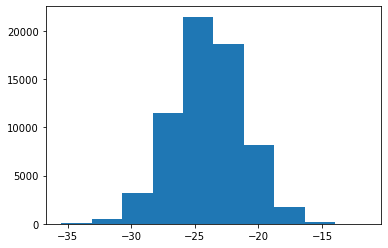

In [20]:
plt.hist(logD);